# 🧠 Exploratory Data Analysis (EDA)

This notebook explores the **Rossmann Sales dataset** to identify sales patterns, missing values, and trends over time.


Load necessary libraries:


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 🗃️ Dataset Overview

We begin by merging the `train.csv` and `store.csv` files to enrich our analysis with store-level attributes.

---

In [5]:
# Load data
train = pd.read_csv("~/rossmann-sales-forecast/data/raw/train.csv")
store = pd.read_csv("~/rossmann-sales-forecast/data/raw/store.csv")

# Merge datasets
df = pd.merge(train, store, on='Store')

# Basic overview
df.info()
df.describe()

# Missing values
df.isnull().sum()

/tmp/ipykernel_11035/1690262725.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("~/rossmann-sales-forecast/data/raw/train.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

## 📊 Sales Distribution

The distribution of sales helps us identify outliers and the overall skewness of the dataset.

> A right-skewed distribution may suggest many stores have low to moderate sales, with a few having very high values.

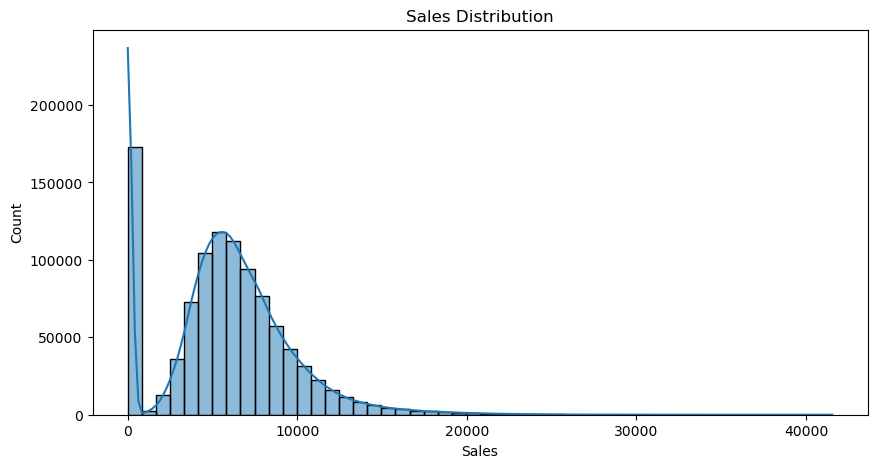

In [7]:
# Sales distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title("Sales Distribution")
plt.show()

## 📈 Sales Over Time - Example: Store 1

We plot sales over time for a single store to understand trends and seasonality.

> This is crucial to determine whether time-based features like month or day of week can help the predictive model.


/tmp/ipykernel_11035/3135726125.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_store['Date'] = pd.to_datetime(sample_store['Date'])
/tmp/ipykernel_11035/3135726125.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_store.sort_values('Date', inplace=True)


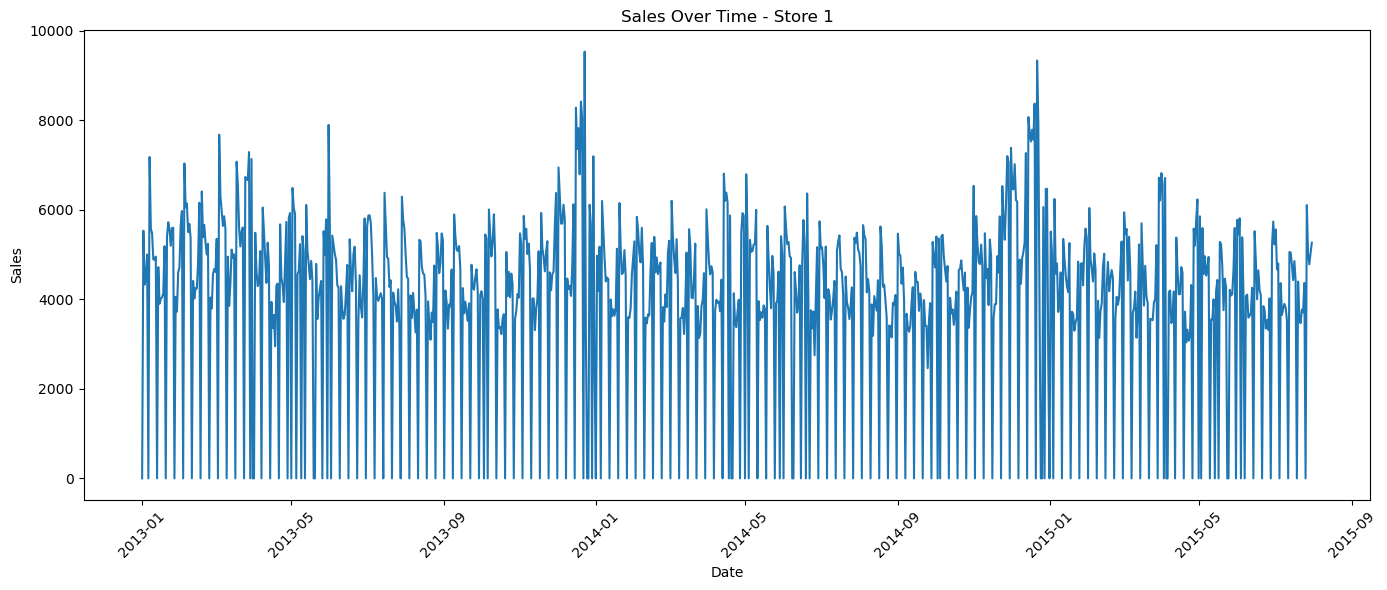

In [8]:
# Sales over time per store
sample_store = df[df['Store'] == 1]
sample_store['Date'] = pd.to_datetime(sample_store['Date'])
sample_store.sort_values('Date', inplace=True)

plt.figure(figsize=(14,6))
plt.plot(sample_store['Date'], sample_store['Sales'])
plt.title("Sales Over Time - Store 1")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()